In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process
import multiprocessing
import codecs
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn import metrics

In [3]:
health_f = pd.read_csv('patient_data_file.csv')
health_f = health_f.drop(columns='Unnamed: 0')
health_f.fillna(0)

In [4]:
health_f.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,is_primary,is_secondary,is_tertiary,ClmProcedureCode_1_count,ClmProcedureCode_2_count,ClmProcedureCode_3_count,ClmDiagnosisCode_1_count,ClmDiagnosisCode_2_count,ClmDiagnosisCode_3_count,is_alive
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,0,0,2009-04-12,...,1,0,0,0.0,0.0,0.0,66.0,22378.0,595.0,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,0,0,...,1,1,0,0.0,0.0,0.0,38.0,4128.0,114.0,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,1,1,6.0,291.0,0.0,105.0,252.0,916.0,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,0,2009-10-17,...,1,1,0,20.0,0.0,0.0,1655.0,427.0,74.0,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1022.0,0.0,0.0,428.0,4.0,14408.0,1
5,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,0,2009-01-08,...,1,1,0,34.0,0.0,0.0,366.0,0.0,0.0,1
6,BENE25016,CLM372477,2009-05-22,2009-05-22,PRV55912,20,PHY416719,0,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,BENE28966,CLM56700,2009-06-22,2009-06-25,PRV55912,10000,PHY418191,PHY370861,0,2009-06-22,...,1,1,0,56.0,0.0,0.0,434.0,278.0,2757.0,1
8,BENE29251,CLM42062,2009-03-11,2009-03-19,PRV55912,18000,PHY318892,0,0,2009-03-11,...,1,0,0,0.0,0.0,0.0,41.0,11272.0,254.0,1
9,BENE31905,CLM37729,2009-02-10,2009-03-03,PRV55912,13000,PHY319720,PHY392080,PHY380413,2009-02-10,...,1,1,1,809.0,0.0,0.0,1655.0,649.0,226.0,1


In [5]:
col_to_remove = ['Provider','BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',\
                 'OperatingPhysician', 'OtherPhysician','ClmAdmitDiagnosisCode','NoOfMonths_PartACov',\
                 'NoOfMonths_PartBCov','DiagnosisGroupCode','AdmissionDt','DischargeDt']
diagnosis_codes = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10']

procedure_codes = ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']
oth_cols = ['DOB','DOD','Claim_Start','Claim_Start','Admission_Date','Admission_Date','Claim_End','Discharge_Date']
health_f.drop(columns=col_to_remove, axis=1, inplace=True)
health_f.drop(columns=diagnosis_codes, axis=1, inplace=True)
health_f.drop(columns=procedure_codes, axis=1, inplace=True)

In [6]:
health_f.drop(columns=oth_cols, axis=1, inplace=True)

In [7]:
health_y = health_f['PotentialFraud']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(health_f.drop(['PotentialFraud'], axis=1),health_y,stratify=health_y,test_size=0.2,random_state=15)

In [9]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
def scale_fun(X_train,X_test,col):   
    min_max_scaler.fit(X_train[col].values.reshape(-1,1))
    
    X_train_=min_max_scaler.transform(X_train[col].values.reshape(-1,1))
    X_test_=min_max_scaler.transform(X_test[col].values.reshape(-1,1))
    
    return X_train_,X_test_

for col in X_train.columns:
    X_train_,X_test_= scale_fun(X_train,X_test,col)

    X_train[col] = X_train_
    X_test[col] = X_test_

1. I'll do an analysis with XGBoost

-> HYPERPARAMETER TUNING WITH SCORING AS MACRO F1 SCORE

In [10]:
# A parameter grid for XGBoost
parameters = {    
    'n_estimators': [100,500,1000],
    'learning_rate': [0.1, 0.01, 0.05]
}

xgb = XGBClassifier(objective='binary:logistic',
                    silent=True, nthread=4)

xg_grid = GridSearchCV(xgb, param_grid=parameters, n_jobs=-1, verbose=1,scoring='f1_macro',cv=3,return_train_score=True)
xg_grid.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed: 17.7min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 18.7min finished


[13:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, silent=True,
                                     subsample

In [11]:
train_f1= xg_grid.cv_results_['mean_train_score']

cv_f1 = xg_grid.cv_results_['mean_test_score'] 
print(train_f1)
print("*********************")
print(cv_f1)

[0.91580795 0.974922   0.98800572 0.84793281 0.88297437 0.91319882
 0.88397907 0.95603187 0.97377178]
*********************
[0.91507241 0.97209153 0.98192933 0.847576   0.88243669 0.91246511
 0.88333002 0.954548   0.97098055]


In [23]:
from sklearn.metrics import f1_score
best_est=xg_grid.best_params_['n_estimators']
best_rate=xg_grid.best_params_['learning_rate']
xgb_model = XGBClassifier(max_depth=10,n_estimators=best_est,learning_rate=best_rate,objective='binary:logistic',silent=True, nthread=4,njobs=-1).fit(X_train, y_train) 
xgb_prediction = xgb_model.predict(X_test)
print('training score:', f1_score(y_train,xgb_model.predict(X_train), average='macro'))
print('testing score:', f1_score(y_test,xgb_prediction, average='macro'))

[13:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { njobs, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
training score: 0.999820977203105
testing score: 0.9891812442242877


-> HYPERPARAMETER TUNING WITH SCORING AS ROC AUC SCORE

In [19]:
# A parameter grid for XGBoost
parameters = {    
    'n_estimators': [100,500,1000],
    'learning_rate': [0.1, 0.01, 0.05]
}

xgb = XGBClassifier(objective='binary:logistic',
                    silent=True, nthread=4)

xg_grid = GridSearchCV(xgb, param_grid=parameters, n_jobs=-1, verbose=1,scoring='roc_auc',cv=3,return_train_score=True)
xg_grid.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed: 17.2min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 18.2min finished


[18:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, silent=True,
                                     subsample

In [17]:
def pred_func(model,data):
  list1=[]
  list1=model.predict_proba(data)[:,1]
  return list1

[18:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<IPython.core.display.Javascript object>


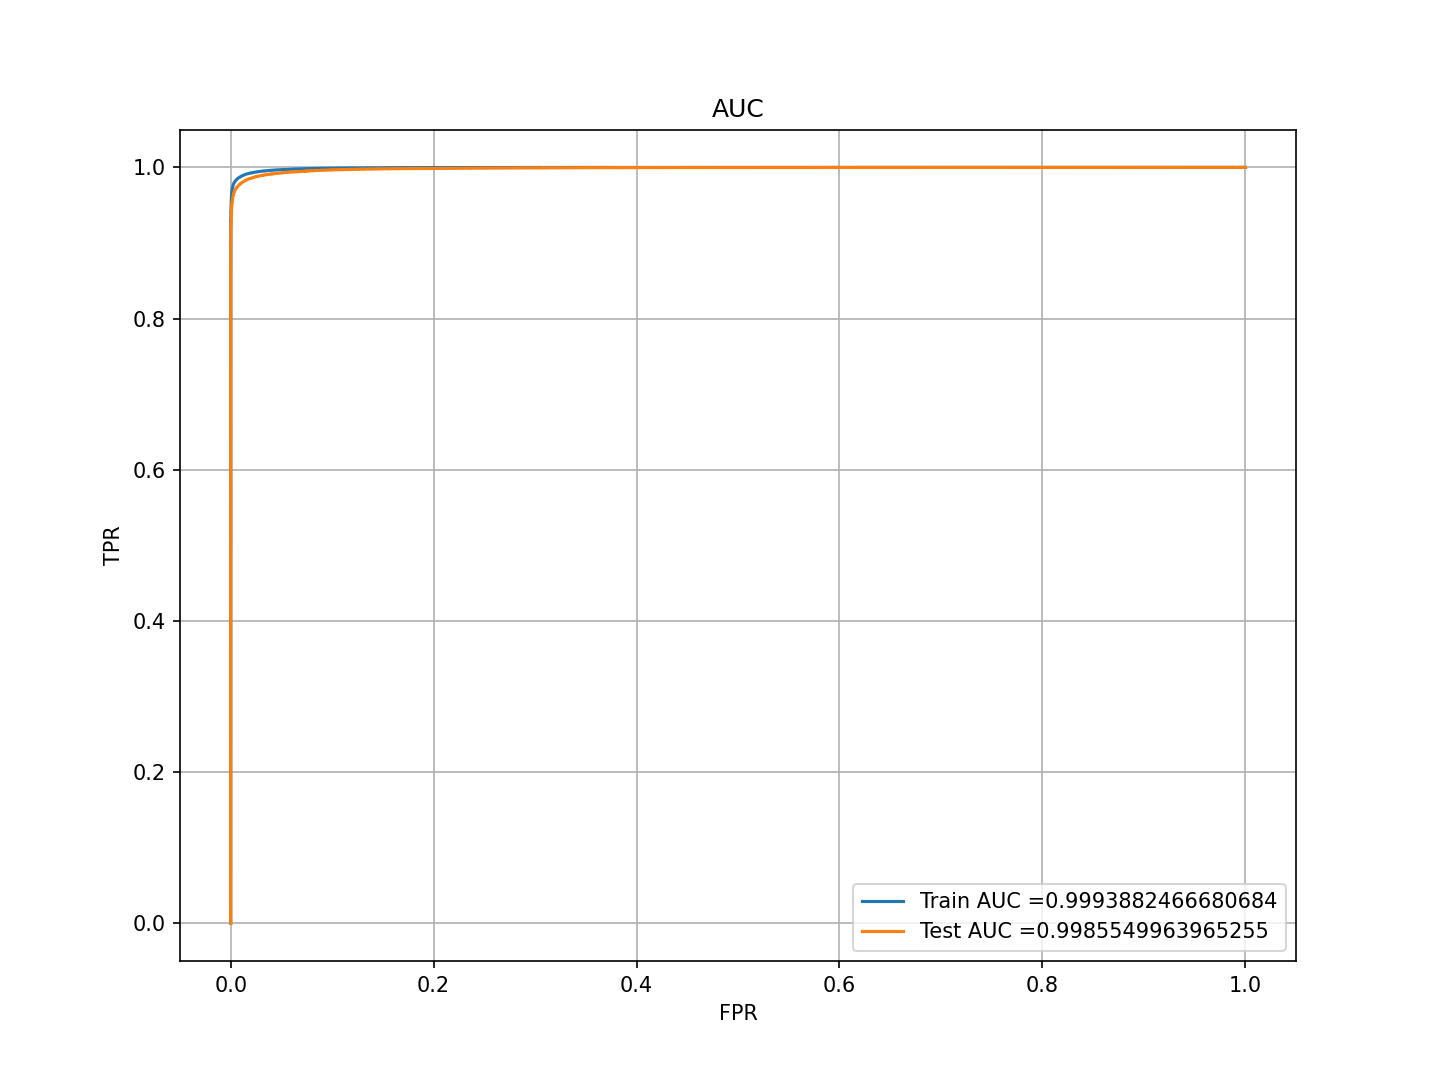

In [20]:
from sklearn.metrics import roc_curve, auc
best_est=xg_grid.best_params_['n_estimators']
best_rate=xg_grid.best_params_['learning_rate']
xg1= XGBClassifier(learning_rate=best_rate,n_estimators=best_est,objective='binary:logistic',
                    silent=True, nthread=4)

xg1.fit(X_train, y_train)

y_train_pred = pred_func(xg1,X_train)
y_test_pred = pred_func(xg1,X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [21]:
feature_important = xg1.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.head(20)

,score
provider_count,14960
State,5550
attend_physician_count,4258
County,3218
OPAnnualReimbursementAmt,816
total_diff_amount,800
ClmDiagnosisCode_1_count,713
OPAnnualDeductibleAmt,668
InscClaimAmtReimbursed,634
ClmDiagnosisCode_2_count,502


In [22]:
%matplotlib inline

In [57]:
s1 = data['score']
s_s1 = sum(s1.tolist())
s_s1

36218

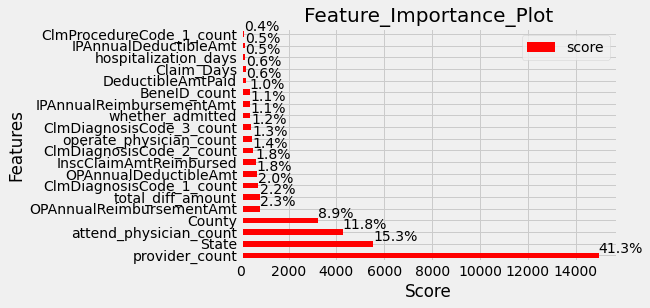

In [60]:
plt.style.use('fivethirtyeight')
ax=data.head(20).plot(kind = 'barh' , color = 'red')
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/s_s1) 
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel ('Score')
plt.ylabel ('Features')
plt.title('Feature_Importance_Plot',fontsize=20)
plt.show()

In [20]:
from prettytable import PrettyTable

x1 = PrettyTable()
x1.field_names = ["Model","Train AUC Score","Test AUC Score","Train F1 Score","Test F1 Score"]

x1.add_row(["XgBoost", 0.99938, 0.99855,0.99982, 0.98918])
print(x1)

+---------+-----------------+----------------+----------------+---------------+
|  Model  | Train AUC Score | Test AUC Score | Train F1 Score | Test F1 Score |
+---------+-----------------+----------------+----------------+---------------+
| XgBoost |     0.99938     |    0.99855     |    0.99982     |    0.98918    |
+---------+-----------------+----------------+----------------+---------------+


2. DUE TO LESS DIMENSIONS, I'LL GO WITH DECISION TREE

In [27]:
parameters = {'max_depth':[1, 5, 10, 20],
              'min_samples_split':[5, 10, 100, 500]}

dt = DecisionTreeClassifier(class_weight='balanced')
#https://stackoverflow.com/questions/56690784/gridsearchcv-not-fetching-mean-test-score-in-colab/57136992
nb_grid = GridSearchCV(dt, param_grid=parameters, n_jobs=-1, verbose=1,scoring='roc_auc',cv=3,return_train_score=True)
nb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   26.2s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 20],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

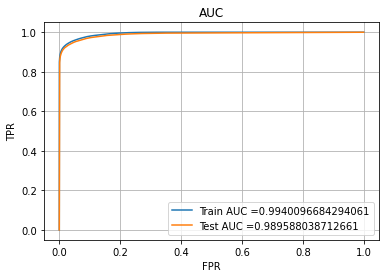

In [28]:
from sklearn.metrics import roc_curve, auc
best_depth=nb_grid.best_params_['max_depth']
best_samples=nb_grid.best_params_['min_samples_split']
dt_1 = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_samples)

dt_1.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = pred_func(dt_1,X_train)
y_test_pred = pred_func(dt_1,X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [52]:
parameters = {'max_depth':[1, 5, 10, 20, 50],
              'min_samples_split':[5, 10, 100, 500]}

dt = DecisionTreeClassifier()
#https://stackoverflow.com/questions/56690784/gridsearchcv-not-fetching-mean-test-score-in-colab/57136992
nb_grid = GridSearchCV(dt, param_grid=parameters, n_jobs=-1, verbose=1,scoring='f1_macro',cv=3,return_train_score=True)
nb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   27.9s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 20, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='f1_macro', verbose=1)

In [53]:
from sklearn.metrics import roc_curve, auc
best_depth=nb_grid.best_params_['max_depth']
best_samples=nb_grid.best_params_['min_samples_split']
dt_1 = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_samples)

dt_1.fit(X_train, y_train)

print('training score:', f1_score(y_train,dt_1.predict(X_train), average='macro'))
print('testing score:', f1_score(y_test,dt_1.predict(X_test), average='macro'))



training score: 0.993147070598641
testing score: 0.9771496102305947


In [21]:
x2 = PrettyTable()
x2.field_names = ["Model","Train AUC Score","Test AUC Score","Train F1 Score","Test F1 Score"]

x2.add_row(["Decision_Tree",0.9967,0.9909,0.99314,0.9771])
print(x2)

+---------------+-----------------+----------------+----------------+---------------+
|     Model     | Train AUC Score | Test AUC Score | Train F1 Score | Test F1 Score |
+---------------+-----------------+----------------+----------------+---------------+
| Decision_Tree |      0.9967     |     0.9909     |    0.99314     |     0.9771    |
+---------------+-----------------+----------------+----------------+---------------+


3. FINALLY STACKING CLASSIFIER IS USED

In [ ]:
# Due to non interpretable issues, this is not used for real world practice for my medical data

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
x_cfl=XGBClassifier(n_estimators=1000,nthread=-1)
x_1=XGBClassifier(n_estimators=500,nthread=-1)
x_2=XGBClassifier(n_estimators=500,nthread=-1)

x_3 = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_samples,class_weight='balanced')
x_4 = LogisticRegression(class_weight='balanced')
s_clf = StackingClassifier(classifiers=[x_1,x_2,x_3,x_4],meta_classifier=x_cfl)
s_clf.fit(X_train,y_train)
#sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
#sig_clf.fit(X_train_f, y_train_f)
y_train_pred = pred_func(s_clf,X_train)
y_test_pred = pred_func(s_clf,X_test)
print ("The train roc_auc Score is:",roc_auc_score(y_train, y_train_pred ))
print("***********************")
print("The test roc_auc Score is",roc_auc_score(y_test,y_test_pred))
print("***********************")
y_train_pred = s_clf.predict(X_train)
y_test_pred = s_clf.predict(X_test)
print ("The train f1 Score is:",f1_score(y_train, y_train_pred,average='micro'))
print("***********************")
print ("The test f1 Score is:",f1_score(y_test, y_test_pred,average='micro'))

[19:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:20:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The train roc_auc Score is: 0.9953706848932281
***********************

In [22]:
x3 = PrettyTable()
x3.field_names = ["Model","Train AUC Score","Test AUC Score","Train F1 Score","Test F1 Score"]

x3.add_row(["Stacking_Classifier",0.99537,0.99020,0.99429,0.98759])
print(x3)

+---------------------+-----------------+----------------+----------------+---------------+
|        Model        | Train AUC Score | Test AUC Score | Train F1 Score | Test F1 Score |
+---------------------+-----------------+----------------+----------------+---------------+
| Stacking_Classifier |     0.99537     |     0.9902     |    0.99429     |    0.98759    |
+---------------------+-----------------+----------------+----------------+---------------+


4. Custom Stacking Implementation

In [10]:
#In the 80% train set, split the train set into d1 and d2.(50-50).
d1,d2,y1,y2 = train_test_split(X_train,y_train,stratify=y_train,test_size=0.5,random_state=15)
d1 = d1.reset_index(drop=True)
d2 = d2.reset_index(drop=True)
y1 = y1.reset_index(drop=True)
y2 = y2.reset_index(drop=True)

In [11]:
def generating_samples(d1, y1):
    """From this d1,sampling with replacement is done
    """
    index = np.random.choice(d1.shape[0], int(0.6*d1.shape[0]), replace=False) 
    x_random = d1.iloc[index]
    y_random = y1[index]
    
    index_dup = np.random.choice(x_random.shape[0], 89314,replace=True) 
    x_random_dup = x_random.iloc[index_dup]  
    
    y_random_dup = y_random.iloc[index_dup]
    
    y_random = np.resize(y_random, (y_random.shape[0], 1))
    y_random_dup = np.resize(y_random_dup, (y_random_dup.shape[0], 1))
    final_sample_data=np.vstack((x_random,x_random_dup))
    final_target_data=np.vstack((y_random,y_random_dup))
    return final_sample_data,final_target_data 

In [13]:
def sample_gen(x,y,n):
    """ to create d1,d2,d3....dn(n samples)
    """
    list_input_data =[]
    list_output_data =[]
    
    for i in range(0,n):
        a,b=generating_samples(x, y)
        list_input_data.append(a)
        list_output_data.append(b)        
    return list_input_data,list_output_data

In [14]:
def model_gen(list_input_data,list_output_data,n):
    """ create 'n' models and train each of these models with each of these n samples.
    """
    aggr = list()
    for i in range(0,n):
        sample = list_input_data
        target = list_output_data
        model = DecisionTreeClassifier()
        model.fit(sample[i],target[i])
        aggr.append(model)
    return aggr

In [15]:
def pred_fun(x,aggr):
    """ Now pass the d2 set to each of these n models,
    now you will get n predictions for d2, from each of these models.
    """
    pred_list=[]
    for m_i in range(len(aggr)):        
        y_pred=aggr[m_i].predict(x)
        pred_list.append(y_pred)
    return pred_list

In [16]:
def datafr(aggr,pred_list):
    """ Now using these n predictions creating a new dataset,
    """
    meta_df = pd.DataFrame()
    for i in range(len(aggr)):
        meta_df['model'+str(i)]= pred_list[i]
    return meta_df

In [17]:
def custom_fun(x,y,n):    
    list_input_data,list_output_data = sample_gen(d1,y1,n)    
    aggr = model_gen(list_input_data,list_output_data,n)
    pred_list = pred_fun(d2,aggr)
    meta_df = datafr(aggr,pred_list)
    #For D2,we already know it's corresponding target values, so now we train a meta model with these n predictions.
    xg_model= XGBClassifier(learning_rate=0.1,n_estimators=1000,max_depth=10,objective='binary:logistic',silent=True, nthread=4)
    xg_model.fit(meta_df,y2)
    test_list = pred_fun(X_test,aggr) #Passing the test set to each of the base models and we will get 'n' predictions
    meta_test = datafr(aggr,test_list)#Create a new dataset with these 'n' predictions and passing it to the metamodel to get the final prediction
    y_pred = xg_model.predict(meta_test)
    return y_pred

In [18]:
#Paramter tuning for the number of base models
estimators = [50,100,150]
for i in estimators:
    y_pred = custom_fun(X_train,y_train,i)     
    print('Testing score for ', i, "base models is:",f1_score(y_test,y_pred, average='macro'))

[12:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Testing score for  50 base models is: 0.9800018715733556
[12:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down t

In [19]:
from prettytable import PrettyTable
x4 = PrettyTable()
x4.field_names = ["Custom_Stacking_Implementation","Base Models","Test F1 Score"]

x4.add_row(["",50,0.980001])
x4.add_row(["",100,0.981479])
x4.add_row(["",150,0.982725])
print(x4)

+--------------------------------+-------------+---------------+
| Custom_Stacking_Implementation | Base Models | Test F1 Score |
+--------------------------------+-------------+---------------+
|                                |      50     |    0.980001   |
|                                |     100     |    0.981479   |
|                                |     150     |    0.982725   |
+--------------------------------+-------------+---------------+


SUMMARY

In [23]:
print(x1,x2,x3,x4)

+---------+-----------------+----------------+----------------+---------------+
|  Model  | Train AUC Score | Test AUC Score | Train F1 Score | Test F1 Score |
+---------+-----------------+----------------+----------------+---------------+
| XgBoost |     0.99938     |    0.99855     |    0.99982     |    0.98918    |
+---------+-----------------+----------------+----------------+---------------+ +---------------+-----------------+----------------+----------------+---------------+
|     Model     | Train AUC Score | Test AUC Score | Train F1 Score | Test F1 Score |
+---------------+-----------------+----------------+----------------+---------------+
| Decision_Tree |      0.9967     |     0.9909     |    0.99314     |     0.9771    |
+---------------+-----------------+----------------+----------------+---------------+ +---------------------+-----------------+----------------+----------------+---------------+
|        Model        | Train AUC Score | Test AUC Score | Train F1 Score | Te